#Proyecto analítica de textos etapa 1

Estudiantes:
1. Mariana Lozano Roncancio 202122878
2. Isabella Lozano Roncancio 202221012
3. Catalina Alvarez Latorre 202220307

#Rubrica/Entregables

| Concepto | Porcentaje |
|----------|-----------|
|Documentación del proceso de aprendizaje automático|20%|
|Entendimiento y preparación de los datos (a nivel de código y análisis)|20%|
|Modelado y evaluación|20%|
|Resultados|20%|
|Trabajo en equipo|8%|
|Sustentacion y trabajo individual|12%|

#Problema

En la era digital, la proliferación de noticias falsas representa una amenaza significativa para la sociedad, especialmente en el ámbito político, donde pueden influir en la opinión pública y en la estabilidad democrática. Este proyecto busca desarrollar un modelo de analítica de textos basado en aprendizaje automático para la detección de noticias falsas en política. Utilizando un conjunto de datos de noticias provenientes de diversas fuentes periodísticas, el objetivo es identificar patrones lingüísticos y términos característicos que permitan diferenciar entre información veraz y desinformación. La implementación de este modelo no solo permitirá mejorar la precisión en la clasificación de noticias, sino que también ofrecerá herramientas analíticas para mitigar el impacto de la desinformación en la toma de decisiones de ciudadanos y organizaciones.

# Reflexion

En un mundo donde la información fluye a gran velocidad, la desinformación se ha convertido en un desafío crítico que afecta la percepción de la realidad y la toma de decisiones en distintos ámbitos, especialmente en la política. La difusión de noticias falsas puede generar polarización, socavar la confianza en las instituciones y manipular la opinión pública con fines estratégicos. Por ello, el desarrollo de modelos de analítica de textos basados en inteligencia artificial no solo es una herramienta tecnológica, sino también una responsabilidad social. Si bien los algoritmos pueden ayudar a detectar patrones y clasificar noticias con mayor precisión, es fundamental complementar estas soluciones con estrategias de alfabetización mediática y regulación ética. Solo con un enfoque integral podremos contrarrestar eficazmente los efectos negativos de la desinformación y fortalecer una sociedad más informada y resiliente.



#1. Instalacion de librerias

In [1]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# librería para manejar las flexiones gramaticales en el idioma espanol.

# librería para manejar las flexiones gramaticales en el idioma espanol.
!pip install spacy
!python -m spacy download es_core_news_sm
!pip install ydata-profiling



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     --------------------------------------- 0.0/12.9 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.1/12.9 MB 409.6 kB/s eta 0:00:32
     --------------------------------------- 0.1/12.9 MB 590.8 kB/s eta 0:00:22
     --------------------------------------- 0.2/12.9 MB 706.2 kB/s eta 0:00:19
      -------------------------------------- 0.2/12.9 MB 808.4 kB/s eta 0:00:16
      -------------------------------------- 0.3/12.9 MB 817.9 kB/s eta 0:00:16
      -------------------------------------- 0.3/12.9 MB 817.9 kB/s eta 0:00:16
      -------------------------------------- 0.3/12.9 MB 731.4 kB/s eta 0:00:18
     - ------------------------------------- 0.3/12.9 MB 723.4 kB/s eta 0:00:18
     - ------------------------------------- 0.3/12.9 MB 696.7 kB/s eta 0:00:18
     - ------------------------------------- 0.4/12.9 MB


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MarianaLozano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
# ¿Cuales son esas palabras vacías?

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MarianaLozano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MarianaLozano\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [6]:
# Instalación de librerias
import pandas as pd
import re
import string
import unicodedata
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling
import contractions

import nltk
import spacy

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix


from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.6
    Uninstalling visions-0.7.6:
      Successfully uninstalled visions-0.7.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.2 requires visions[type_image_path]<0.8.0,>=0.7.5, but you have visions 0.7.4 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Perfilameinto y entendimiento de datos

In [7]:
# Uso de la libreria pandas para la lectura de archivos
data = pd.read_csv('./datos/fake_news_spanish.csv', sep=';', encoding='utf-8', on_bad_lines='warn')
# Asignación a una nueva variable de los datos leidos
data_t = data

In [8]:
data_t

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018
...,...,...,...,...,...
57058,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,08/06/2021
57059,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,08/09/2020
57060,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,12/07/2018
57061,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,13/02/2022


In [9]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57063 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           57063 non-null  object
 1   Label        57063 non-null  int64 
 2   Titulo       57047 non-null  object
 3   Descripcion  57063 non-null  object
 4   Fecha        57063 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


#### Entendimiento de los Datos

Realizaremos estadísticas descriptivas para poder obtener un análisis de los textos.

In [10]:
textos = data_t.copy()
textos['Conteo'] = [len(str(x)) if not isinstance(x, float) or not np.isnan(x) else 0 for x in textos['Titulo']]
textos['Moda'] = textos['Conteo'].mode()[0]
textos['Max'] = [[max([len(x) for x in str(i).split(' ')])][0] if not isinstance(i, float) or not np.isnan(i) else 0 for i in textos['Titulo']]
textos['Min'] = [[min([len(x) for x in str(i).split(' ')])][0] if not isinstance(i, float) or not np.isnan(i) else 0 for i in textos['Titulo']]

In [11]:
#ProfileReport(textos)

In [12]:
textos

,ID,Label,Titulo,Descripcion,Fecha,Conteo,Moda,Max,Min
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,77,82,9,2
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,104,82,10,1
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,77,82,10,1
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,110,82,12,1
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,72,82,11,2
...,...,...,...,...,...,...,...,...,...
57058,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,08/06/2021,116,82,9,1
57059,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,08/09/2020,100,82,11,1
57060,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,12/07/2018,90,82,14,2
57061,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,13/02/2022,118,82,16,1


# Preparacion de los datos

Pasos:

* Limpieza de los datos.
* Tokenización.
* Normalización.

### **Limpieza de los datos**

In [13]:
import nltk
nltk.download('punkt_tab')

# Download necessary NLTK data if not already present
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load Spanish language model for spaCy
stopwords_es = [
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "las", "por", "un", "para",
    "con", "no", "una", "su", "al", "es", "lo", "como", "más", "pero", "sus", "le", "ya",
    "o", "este", "sí", "porque", "esta", "entre", "cuando", "muy", "sin", "sobre", "también",
    "me", "hasta", "hay", "donde", "quien", "desde", "todo", "nos", "durante", "todos",
    "uno", "les", "ni", "contra", "otros", "ese", "eso", "ante", "ellos", "e", "esto"
]


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words




def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('spanish'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    #words = stem_words(words) #Consider removing or using lemmatization instead
    words = lemmatize_verbs(words)
    return words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

data_t['Titulo_procesado'] = data_t['Titulo'].astype(str).apply(word_tokenize)

data_t['Titulo_procesado'] = data_t['Titulo_procesado'].apply(normalize)
data_t['Titulo_procesado'] = data_t['Titulo_procesado'].apply(lambda x: ' '.join(x))

print(data_t.head())


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\MarianaLozano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


   ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion       Fecha  \
0  El diario británico publicó este pasado jueves...  02/06/2023   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023   
2  El valencianismo convoca en Castelló su fiesta...  25/04/2022   
3  En política, igual que hay que negociar con lo...  03/01/2022   
4  En una entrevista en El Punt Avui, el líder de...  09/03/2018   

                                    Titulo_procesado  
0  the guardian va sanchez europa necesita apuest...  
1  revelan gobierno negocio liberacion mireles ca...  
2  ahora nunca joan fus

## **Tokenización**

In [14]:
# prompt: Aplica la corrección de las contracciones

def expand_contractions(text):
    """Expand contractions in a given text."""
    expanded_text = contractions.fix(text)
    return expanded_text


data_t['Titulo'] = data_t['Titulo'].astype(str).apply(expand_contractions)


In [15]:
data_t['Descripcion'] = data_t['Descripcion'].astype(str).apply(word_tokenize)

In [16]:
data_t['Descripcion'].dropna()

0        [El, diario, británico, publicó, este, pasado,...
1        [REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...
2        [El, valencianismo, convoca, en, Castelló, su,...
3        [En, política, ,, igual, que, hay, que, negoci...
4        [En, una, entrevista, en, El, Punt, Avui, ,, e...
                               ...                        
57058    [El, gobierno, regional, han, indicado, que, l...
57059    [Si, la, higiene, democrática, nos, lleva, a, ...
57060    [El, coordinador, federal, de, IU, asegura, qu...
57061    [Santiago, Abascal, :, Vox, tiene, el, derecho...
57062    [Los, Mossos, dEsquadra, han, blindado, los, a...
Name: Descripcion, Length: 57063, dtype: object

In [17]:
data_t.shape

(57063, 6)

In [18]:
data_t['Descripcion'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 57063 entries, 0 to 57062
Series name: Descripcion
Non-Null Count  Dtype 
--------------  ----- 
57063 non-null  object
dtypes: object(1)
memory usage: 445.9+ KB


In [19]:
data_t['Descripcion1']=data_t['Descripcion'].apply(preprocessing) #Aplica la eliminación del ruido

data_t.head()


,ID,Label,Titulo,Descripcion,Fecha,Titulo_procesado,Descripcion1
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,"[El, diario, británico, publicó, este, pasado,...",02/06/2023,the guardian va sanchez europa necesita apuest...,"[diario, britanico, publico, pasado, jueves, e..."
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,"[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...",01/10/2023,revelan gobierno negocio liberacion mireles ca...,"[revelan, gobierno, negocio, liberacion, mirel..."
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,"[El, valencianismo, convoca, en, Castelló, su,...",25/04/2022,ahora nunca joan fuster estatuto valenciano cu...,"[valencianismo, convoca, castello, fiesta, gra..."
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","[En, política, ,, igual, que, hay, que, negoci...",03/01/2022,iglesias alienta yolanda diaz erc eh bildu neg...,"[politica, igual, negociar, empresarios, negoc..."
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"[En, una, entrevista, en, El, Punt, Avui, ,, e...",09/03/2018,puigdemont seria ninguna tragedia repeticion e...,"[entrevista, punt, avui, lider, jxcat, desdram..."


## Normalizacion

En la normalización de los datos se realiza la eliminación de prefijos y sufijos, además de realizar una lemmatización.

In [20]:
# Stem_words y de Lemmatize_verbs

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

# Call the function after it has been defined
data_t['Descripcion'] = data_t['Descripcion'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data_t.head()

,ID,Label,Titulo,Descripcion,Fecha,Titulo_procesado,Descripcion1
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,"[el, diario, británico, publicó, est, pasado, ...",02/06/2023,the guardian va sanchez europa necesita apuest...,"[diario, britanico, publico, pasado, jueves, e..."
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,"[revel, que, el, gobierno, negocio, la, libera...",01/10/2023,revelan gobierno negocio liberacion mireles ca...,"[revelan, gobierno, negocio, liberacion, mirel..."
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,"[el, valencianismo, convoc, en, castelló, su, ...",25/04/2022,ahora nunca joan fuster estatuto valenciano cu...,"[valencianismo, convoca, castello, fiesta, gra..."
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","[en, polític, ,, ig, que, hay, que, negoci, co...",03/01/2022,iglesias alienta yolanda diaz erc eh bildu neg...,"[politica, igual, negociar, empresarios, negoc..."
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"[en, un, entrevist, en, el, punt, avu, ,, el, ...",09/03/2018,puigdemont seria ninguna tragedia repeticion e...,"[entrevista, punt, avui, lider, jxcat, desdram..."


##Seleccion de campos

In [21]:
data_t['Descripcion'] = data_t['Descripcion'].apply(lambda x: ' '.join(map(str, x)))
data_t

,ID,Label,Titulo,Descripcion,Fecha,Titulo_procesado,Descripcion1
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,el diario británico publicó est pasado juev un...,02/06/2023,the guardian va sanchez europa necesita apuest...,"[diario, britanico, publico, pasado, jueves, e..."
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,revel que el gobierno negocio la liberación de...,01/10/2023,revelan gobierno negocio liberacion mireles ca...,"[revelan, gobierno, negocio, liberacion, mirel..."
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,el valencianismo convoc en castelló su fiest g...,25/04/2022,ahora nunca joan fuster estatuto valenciano cu...,"[valencianismo, convoca, castello, fiesta, gra..."
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","en polític , ig que hay que negoci con los emp...",03/01/2022,iglesias alienta yolanda diaz erc eh bildu neg...,"[politica, igual, negociar, empresarios, negoc..."
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"en un entrevist en el punt avu , el líder de j...",09/03/2018,puigdemont seria ninguna tragedia repeticion e...,"[entrevista, punt, avui, lider, jxcat, desdram..."
...,...,...,...,...,...,...,...
57058,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,el gobierno reg han indicado que la atención e...,08/06/2021,defensor pueblo reclama comunidad madrid datos...,"[gobierno, regional, indicado, atencion, dia, ..."
57059,ID,0,El EQUO plantea ceder la presidencia de la Com...,si la higy democrátic nos llev a es exigenc de...,08/09/2020,equo plantea ceder presidencia comunidad madri...,"[si, higiene, democratica, lleva, exigencia, t..."
57060,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,el coordinad fed de iu asegur que la monarquí ...,12/07/2018,alberto garzon borbones ladrones hecho histori...,"[coordinador, federal, iu, asegura, monarquia,..."
57061,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,santiago abasc : vox tien el derecho y el deb ...,13/02/2022,vox exige entrar gobierno castilla leon cara v...,"[santiago, abascal, vox, derecho, deber, forma..."


In [22]:
X_data, y_data = data_t['Descripcion'],data_t['Label']
y_data = (y_data == 'spam').astype(int)
y_data

0        0
1        0
2        0
3        0
4        0
        ..
57058    0
57059    0
57060    0
57061    0
57062    0
Name: Label, Length: 57063, dtype: int64

In [23]:
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(X_data)
print(X_dummy.shape)
X_dummy.toarray()[0]

(57063, 62245)


array([0, 0, 0, ..., 0, 0, 0])

In [24]:
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)
X_count.toarray()[0]

(57063, 62245)


array([0, 0, 0, ..., 0, 0, 0])

# Creacion y aplicaicon del modelo Entrenamiento de un Decision Tree

In [33]:
from pandas import DataFrame

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_data and y_data are defined from the previous code
X_train, X_test, y_train, y_test = train_test_split(X_count, y_data, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust hyperparameters
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of RandomForestClassifier: {accuracy}")

# Print classification report for more detailed evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy of RandomForestClassifier: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11413

    accuracy                           1.00     11413
   macro avg       1.00      1.00      1.00     11413
weighted avg       1.00      1.00      1.00     11413



# Entrenamiento de un Random Forest

In [34]:
# Import a random forest

# Create the random forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict the test set
y_pred_test = rf_clf.predict(X_test)

## Training set evaluation

In [35]:
# Evaluate with the training set
y_pred_train = rf_clf.predict(X_train)

# Calculate the accuracy
accuracy_score(y_train, y_pred_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45650

    accuracy                           1.00     45650
   macro avg       1.00      1.00      1.00     45650
weighted avg       1.00      1.00      1.00     45650



c:\Users\MarianaLozano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


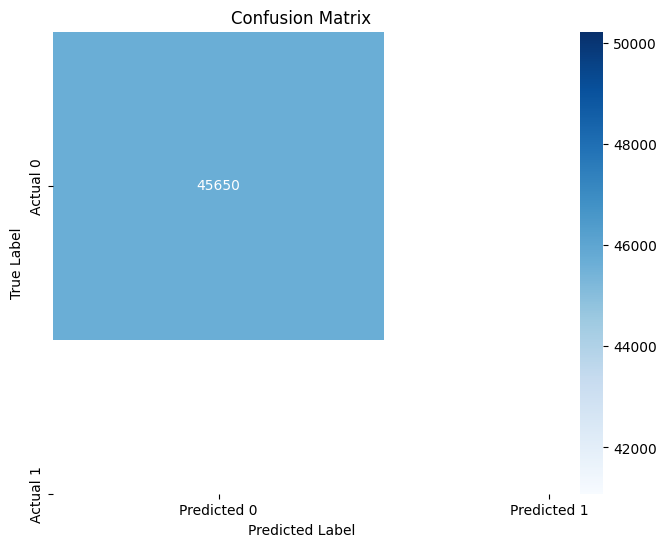

In [ ]:
# Plot confussion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are defined from the previous code

cm = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()